Importing Libraries

1.   numpy for array operations
2.   pandas for handling CSV files if necessary
3.   os for working with directories
4.   PIL and cv2 for handling images
5.   tqdm for progressbar
6.   matplotlib for data visualization



In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

Importing Deep Learning Libraries

1.   tensorflow for creating deep learning model
2.   sequential for creating sequential model
3.   ImageDataGenerator for image augumentation and resizing
4.   Dense for creating dense NN, Activation for using activation function, Conv2D for convolution layer, MaxPooling2D for maxpooling layer


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

Preparing traingin and validation data

1.   Rescaling is done to normalize image data for easy training 
2.   Image is resized to 224*224



In [11]:
IMG_SIZE=224
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1278 images belonging to 4 classes.
Found 318 images belonging to 4 classes.


In [12]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 64)      

verbose=0 will show nothing (silent)

verbose=1 will show an animated progress bar

verbose=2 will just mention the number of epoch

In [13]:
checkpoint=ModelCheckpoint(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/models/model.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [14]:
model_history=(model.fit(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks))

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 1.2735 - accuracy: 0.3344
Epoch 00001: val_loss improved from inf to 1.24741, saving model to /content/drive/MyDrive/Datasets/plant pathology dataset/images/models/model.h5
79/79 [==============================] - 363s 4s/step - loss: 1.2735 - accuracy: 0.3344 - val_loss: 1.2474 - val_accuracy: 0.3322
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 1.2458 - accuracy: 0.3344
Epoch 00002: val_loss improved from 1.24741 to 1.23963, saving model to /content/drive/MyDrive/Datasets/plant pathology dataset/images/models/model.h5
79/79 [==============================] - 66s 843ms/step - loss: 1.2458 - accuracy: 0.3344 - val_loss: 1.2396 - val_accuracy: 0.3355
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 1.2078 - accuracy: 0.4271
Epoch 00003: val_loss improved from 1.23963 to 1.09907, saving model to /content/drive/MyDrive/Datasets/plant pathology dataset/images/models/model.h5
79/79 [

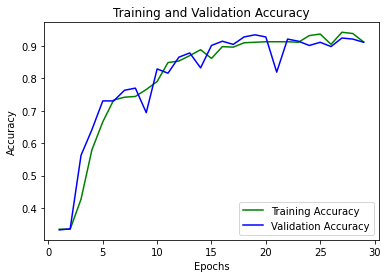

In [16]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,30)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

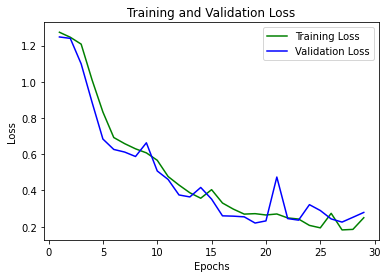

In [17]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,30)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

3


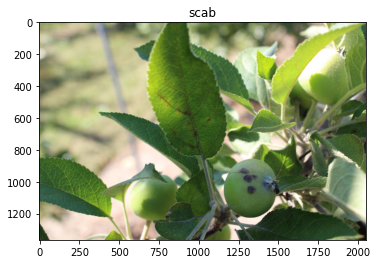

In [20]:
test_image=r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/Test_1267.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()